In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trash-cans/README.dataset.txt
/kaggle/input/trash-cans/README.roboflow.txt
/kaggle/input/trash-cans/data.yaml
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0328_jpg.rf.b02886e024a85e1ed100aeeb1fccf7ef.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0176_jpg.rf.f8dd85b5c3430e73c98360fb34c34666.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0299_jpg.rf.7d2f4fd61f8ea60c100642f30c7a908d.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0136_jpg.rf.4a9dc385ce8a617b583f6a0aa537819a.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0153_jpg.rf.3b71af73080b0643f67e1e4b8fa6c32d.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0381_jpg.rf.3d5d5c6f14ee71a827f90ed750dac959.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0044_jpg.rf.5d855429e88a54b40aeb5f65549f8281.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0110_jpg.rf.3dbc9cd721dead235bf3324df6e7933c.txt
/kaggle/input/trash-cans/test/labels/IMG-20250529-WA0042_jpg.rf.38a2

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.5 MB/s eta 0:00:00:00:0100:01
  Attempting unins

In [3]:
import os, random, shutil

image_dir = '/kaggle/input/trash-cans/train/images'
label_dir = '/kaggle/input/trash-cans/train/labels'

train_img_out = '/kaggle/working/trash-cans/train/images'
train_lbl_out = '/kaggle/working/trash-cans/train/labels'
val_img_out   = '/kaggle/working/trash-cans/val/images'
val_lbl_out   = '/kaggle/working/trash-cans/val/labels'

os.makedirs(train_img_out, exist_ok=True)
os.makedirs(train_lbl_out, exist_ok=True)
os.makedirs(val_img_out, exist_ok=True)
os.makedirs(val_lbl_out, exist_ok=True)

images = os.listdir(image_dir)
random.shuffle(images)
split_idx = int(0.7 * len(images))

train_imgs = images[:split_idx]
val_imgs = images[split_idx:]

for img in train_imgs:
    shutil.copy(os.path.join(image_dir, img), os.path.join(train_img_out, img))
    shutil.copy(os.path.join(label_dir, img.replace('.jpg', '.txt')), os.path.join(train_lbl_out, img.replace('.jpg', '.txt')))

for img in val_imgs:
    shutil.copy(os.path.join(image_dir, img), os.path.join(val_img_out, img))
    shutil.copy(os.path.join(label_dir, img.replace('.jpg', '.txt')), os.path.join(val_lbl_out, img.replace('.jpg', '.txt')))

In [4]:
yaml_content = """
train: /kaggle/working/trash-cans/train/images
val: /kaggle/working/trash-cans/val/images

names:
  0: mini_trashcan
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(yaml_content)

In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # or yolov8s.pt, m.pt, l.pt

model.train(data='/kaggle/working/data.yaml', epochs=10, imgsz=224)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 83.7MB/s]


Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

100%|██████████| 755k/755k [00:00<00:00, 18.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.1MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 207.6±95.5 MB/s, size: 5.6 KB)


train: Scanning /kaggle/working/trash-cans/train/labels... 579 images, 122 backgrounds, 0 corrupt: 100%|██████████| 579/579 [00:00<00:00, 1593.44it/s]

train: New cache created: /kaggle/working/trash-cans/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 191.9±97.8 MB/s, size: 5.4 KB)


val: Scanning /kaggle/working/trash-cans/val/labels... 249 images, 70 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<00:00, 1388.13it/s]

val: New cache created: /kaggle/working/trash-cans/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.334G      1.243      2.007      1.082          2        224: 100%|██████████| 37/37 [00:04<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  4.95it/s]

                   all        249        179          1      0.481      0.951      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.369G      1.231      1.059      1.078          3        224: 100%|██████████| 37/37 [00:02<00:00, 13.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.40it/s]

                   all        249        179          1      0.855      0.992      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.387G      1.216     0.9939      1.067          3        224: 100%|██████████| 37/37 [00:02<00:00, 13.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.33it/s]

                   all        249        179      0.967       0.98      0.989      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.404G      1.164     0.9278      1.054          1        224: 100%|██████████| 37/37 [00:02<00:00, 13.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.82it/s]

                   all        249        179      0.874      0.832      0.912      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.422G       1.09     0.8834     0.9899          0        224: 100%|██████████| 37/37 [00:02<00:00, 14.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  9.70it/s]

                   all        249        179      0.989      0.973      0.991      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.438G      1.068     0.7927       1.01          2        224: 100%|██████████| 37/37 [00:02<00:00, 14.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.26it/s]

                   all        249        179      0.977      0.937      0.978      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.455G     0.9972     0.6925      0.982          3        224: 100%|██████████| 37/37 [00:02<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.26it/s]

                   all        249        179      0.965      0.916      0.964      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.473G     0.9479     0.6345      0.965          2        224: 100%|██████████| 37/37 [00:02<00:00, 14.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.70it/s]


                   all        249        179          1      0.988      0.995      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      0.49G     0.9527     0.6009      0.966          3        224: 100%|██████████| 37/37 [00:02<00:00, 14.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 10.51it/s]


                   all        249        179          1          1      0.995      0.771

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.506G     0.9206     0.5806     0.9751          1        224: 100%|██████████| 37/37 [00:02<00:00, 14.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00, 11.32it/s]

                   all        249        179      0.999          1      0.995      0.794



10 epochs completed in 0.011 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.169 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:01<00:00,  5.98it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        249        179      0.999          1      0.995      0.794
Speed: 0.1ms preprocess, 0.6ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78dce152c290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


image 1/1 /kaggle/input/trash-cans/test/images/IMG-20250529-WA0328_jpg.rf.b02886e024a85e1ed100aeeb1fccf7ef.jpg: 224x224 1 mini_trashcan, 8.4ms
Speed: 0.5ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 224)


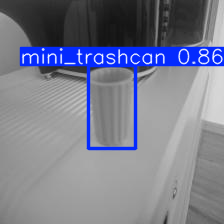

In [12]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
results = model('/kaggle/input/trash-cans/test/images/IMG-20250529-WA0328_jpg.rf.b02886e024a85e1ed100aeeb1fccf7ef.jpg')
results[0].show()

In [13]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'mini_trashcan'}
obb: None
orig_img: array([[[ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62],
        ...,
        [187, 187, 187],
        [193, 193, 193],
        [189, 189, 189]],

       [[ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62],
        ...,
        [189, 189, 189],
        [194, 194, 194],
        [190, 190, 190]],

       [[ 62,  62,  62],
        [ 62,  62,  62],
        [ 62,  62,  62],
        ...,
        [191, 191, 191],
        [194, 194, 194],
        [191, 191, 191]],

       ...,

       [[122, 122, 122],
        [123, 123, 123],
        [124, 124, 124],
        ...,
        [111, 111, 111],
        [109, 109, 109],
        [107, 107, 107]],

       [[120, 120, 120],
        [121, 121, 121],
        [122, 122, 122],
        ...,
        [104, 104, 104],
        [107, 107, 107],
      

In [14]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.8594], device='cuda:0')
data: tensor([[ 88.7635,  65.3214, 135.5377, 148.2240,   0.8594,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (224, 224)
shape: torch.Size([1, 6])
xywh: tensor([[112.1506, 106.7727,  46.7743,  82.9026]], device='cuda:0')
xywhn: tensor([[0.5007, 0.4767, 0.2088, 0.3701]], device='cuda:0')
xyxy: tensor([[ 88.7635,  65.3214, 135.5377, 148.2240]], device='cuda:0')
xyxyn: tensor([[0.3963, 0.2916, 0.6051, 0.6617]], device='cuda:0')